# Entrenamiento de un Perceptrón para la Puerta Lógica AND

Voy a crear un código en Python para entrenar un perceptrón que aprenda la puerta lógica **AND**. Un perceptrón es un tipo de red neuronal que puede clasificar datos linealmente separables. La función AND es un ejemplo simple de un problema que un perceptrón puede resolver. La tabla de verdad de la función AND es la siguiente:

| Entrada 1 | Entrada 2 | Salida (AND) |
|-----------|-----------|--------------|
|     0     |     0     |      0       |
|     0     |     1     |      0       |
|     1     |     0     |      0       |
|     1     |     1     |      1       |

## Explicación del proceso

El perceptrón toma dos entradas (Entrada 1 y Entrada 2) y produce una salida, que en este caso será 0 o 1. La tarea del perceptrón es aprender los pesos adecuados para estas entradas, junto con un sesgo (bias), de modo que la salida coincida con la de la puerta AND.

El algoritmo sigue estos pasos:

1. **Inicialización**: Se inicializan los pesos y el sesgo aleatoriamente.
2. **Función de activación**: Utilizaremos la función de activación escalón (step function), que devuelve 1 si la suma ponderada de las entradas más el sesgo es mayor o igual a 0, y 0 en caso contrario.
3. **Entrenamiento**: Usaremos el algoritmo de aprendizaje del perceptrón, que ajusta los pesos y el sesgo en función del error cometido al predecir la salida.
4. **Actualización de pesos**: Los pesos se actualizan en cada iteración usando la regla:
   \[
   w_j = w_j + \Delta w_j
   \]
   Donde \(\Delta w_j = \eta \cdot (y - \hat{y}) \cdot x_j\), siendo:
   - \(\eta\) la tasa de aprendizaje (learning rate),
   - \(y\) la salida esperada,
   - \(\hat{y}\) la salida predicha,
   - \(x_j\) el valor de la entrada correspondiente.
5. **Iteración**: El proceso se repite durante varias iteraciones hasta que el perceptrón aprenda a clasificar correctamente todas las combinaciones de la función AND.

## Explicación del código

1. **Clase `Perceptron`**: Define el perceptrón, inicializando pesos y sesgo con valores aleatorios. El método `predict` calcula la suma ponderada de las entradas más el sesgo y luego aplica la función de activación (en este caso, la función escalón).
   
2. **Función de entrenamiento (`train`)**: Este método entrena el perceptrón utilizando el conjunto de datos de entrenamiento (entradas y salidas de la puerta AND). En cada iteración:
   - Se realiza una predicción.
   - Se calcula el error entre la salida esperada y la predicción.
   - Los pesos y el sesgo se actualizan utilizando el error y la tasa de aprendizaje (en este caso, 0.1).
   - Se imprime el progreso para ver los cambios en los pesos y el sesgo.

3. **Prueba del perceptrón**: Después del entrenamiento, se prueban todas las combinaciones de la tabla de verdad para ver si el perceptrón ha aprendido correctamente la puerta AND.

## Ejemplo de Salida con 2 iteraciones:

```plaintext
Epoch 1
Entradas: [0 0], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [0.00947364 0.00370835], Nuevo bias: -0.006580118165134964
Entradas: [0 1], Salida esperada: 0, Predicción: 0, Error: 0
Nuevos pesos: [0.00947364 0.00370835], Nuevo bias: -0.006580118165134964
Entradas: [1 0], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [0.00847364 0.00370835], Nuevo bias: -0.016580118165134965
Entradas: [1 1], Salida esperada: 1, Predicción: 0, Error: 1
Nuevos pesos: [0.01847364 0.01370835], Nuevo bias: -0.006580118165134964

Epoch 2
Entradas: [0 0], Salida esperada: 0, Predicción: 0, Error: 0
Nuevos pesos: [0.01847364 0.01370835], Nuevo bias: -0.006580118165134964
Entradas: [0 1], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [0.01847364 0.00370835], Nuevo bias: -0.016580118165134965
Entradas: [1 0], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [ 0.00847364  0.00370835], Nuevo bias: -0.026580118165134966
Entradas: [1 1], Salida esperada: 1, Predicción: 0, Error: 1
Nuevos pesos: [0.01847364 0.01370835], Nuevo bias: -0.016580118165134965


In [1]:
import numpy as np

# Definir la función de activación escalón
def step_function(x):
    return 1 if x >= 0 else 0

# Clase del perceptrón
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Inicializar pesos y bias (con valores aleatorios pequeños)
        self.weights = np.random.rand(input_size) * 0.01
        self.bias = np.random.rand() * 0.01
        self.learning_rate = learning_rate

    # Predicción usando la función de activación
    def predict(self, inputs):
        # Suma ponderada de las entradas más el sesgo
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicar la función de activación (step function)
        return step_function(weighted_sum)

    # Entrenamiento del perceptrón
    def train(self, training_inputs, labels, epochs=10):
        for epoch in range(epochs):
            print(f"\nEpoch {epoch + 1}")
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                # Cálculo del error
                error = label - prediction
                # Actualización de pesos y bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                print(f"Entradas: {inputs}, Salida esperada: {label}, Predicción: {prediction}, Error: {error}")
                print(f"Nuevos pesos: {self.weights}, Nuevo bias: {self.bias}")

# Datos de entrenamiento: tabla de verdad de la puerta AND
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# Crear un perceptrón con dos entradas
perceptron = Perceptron(input_size=2)

# Entrenar el perceptrón durante 10 épocas
perceptron.train(training_inputs, labels, epochs=10)

# Probar el perceptrón
print("\nPrueba del perceptrón para la puerta AND:")
for inputs in training_inputs:
    output = perceptron.predict(inputs)
    print(f"Entradas: {inputs}, Salida predicha: {output}")



Epoch 1
Entradas: [0 0], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [0.00711078 0.00068458], Nuevo bias: -0.09626390213731312
Entradas: [0 1], Salida esperada: 0, Predicción: 0, Error: 0
Nuevos pesos: [0.00711078 0.00068458], Nuevo bias: -0.09626390213731312
Entradas: [1 0], Salida esperada: 0, Predicción: 0, Error: 0
Nuevos pesos: [0.00711078 0.00068458], Nuevo bias: -0.09626390213731312
Entradas: [1 1], Salida esperada: 1, Predicción: 0, Error: 1
Nuevos pesos: [0.10711078 0.10068458], Nuevo bias: 0.003736097862686888

Epoch 2
Entradas: [0 0], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [0.10711078 0.10068458], Nuevo bias: -0.09626390213731312
Entradas: [0 1], Salida esperada: 0, Predicción: 1, Error: -1
Nuevos pesos: [0.10711078 0.00068458], Nuevo bias: -0.19626390213731312
Entradas: [1 0], Salida esperada: 0, Predicción: 0, Error: 0
Nuevos pesos: [0.10711078 0.00068458], Nuevo bias: -0.19626390213731312
Entradas: [1 1], Salida esperada: 1, Predicción:

Separable 

Para modificar el código y tener en cuenta que la salida es booleana (es decir, 0 o 1), se han realizado los siguientes cambios:

1. **Predicción booleana**: 
   - La función sigmoide sigue devolviendo un valor continuo entre 0 y 1, pero después de obtener la predicción, se compara con un umbral (como 0.5) para decidir si es 1 o 0.
   - Esto se implementa en la función `predict`, que retorna 1 si el valor de la sigmoide es mayor o igual a 0.5, y 0 de lo contrario.

2. **Entrenamiento**: 
   - Aunque la predicción será booleana, el proceso de entrenamiento sigue utilizando la sigmoide como función de activación, ya que es necesaria para actualizar los pesos suavemente.
   - El error se sigue calculando como la diferencia entre la salida esperada (0 o 1) y la predicción generada por la sigmoide.

3. **Error**: 
   - El error se calcula como la diferencia entre la salida esperada (un valor booleano, 0 o 1) y la predicción de la función sigmoide, que se utiliza para actualizar los pesos.


Datos cargados del archivo CSV:
          X1        X2  Y
0 -5.184365  0.159747  1
1 -6.896032  4.665585  0
2 -7.523213  4.370739  0
3 -5.149046  1.033213  1
4 -6.495757  4.785311  0


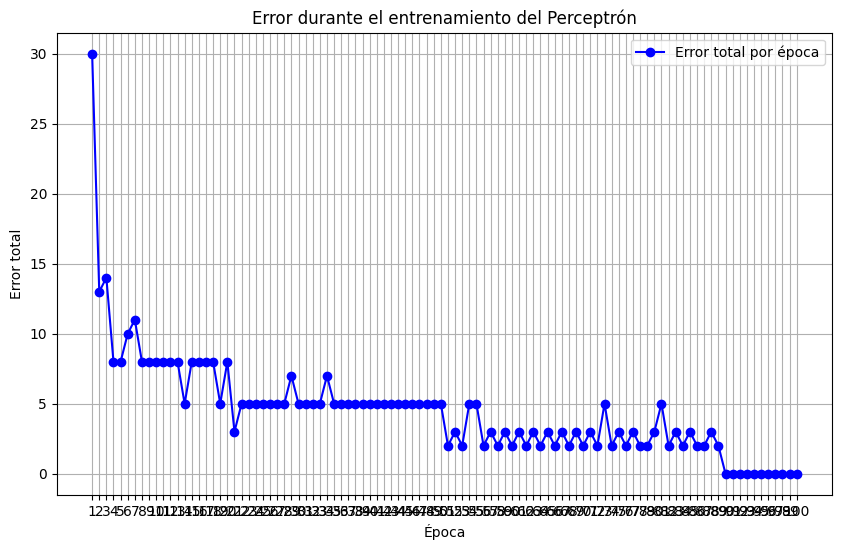

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función de activación escalonada para la salida booleana
def step_function(x):
    return 1 if x >= 0.5 else 0

# Clase del perceptrón
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Inicializar pesos y bias (con valores aleatorios pequeños)
        self.weights = np.random.rand(input_size) * 0.01
        self.bias = np.random.rand() * 0.01
        self.learning_rate = learning_rate

    # Predicción usando la función escalonada
    def predict(self, inputs):
        # Suma ponderada de las entradas más el sesgo
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicar la función de activación (escalonada)
        return step_function(weighted_sum)

    # Entrenamiento del perceptrón utilizando un enfoque simplificado
    def train(self, training_inputs, labels, epochs=100):  # Se establecen 100 épocas aquí
        # Lista para almacenar el error en cada época
        errors = []
        for epoch in range(epochs):
            total_error = 0  # Variable para acumular el error total de la época
            for inputs, label in zip(training_inputs, labels):
                # Calcular la salida predicha
                prediction = self.predict(inputs)
                
                # Calcular el error (diferencia entre la salida real y la predicción)
                error = label - prediction
                
                # Actualización de pesos y bias usando un promedio de errores
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                
                # Acumular el error total
                total_error += abs(error)
            
            # Almacenar el error total para esta época
            errors.append(total_error)
       

        # Devolver la lista de errores para graficar
        return errors

# Cargar el conjunto de datos separables.csv con nombres de columnas
data = pd.read_csv('separables.csv', sep=';')  # Sin header=None, se leerán las cabeceras automáticamente

# Inspeccionar las primeras filas del archivo para asegurarnos de que se han leído correctamente
print("Datos cargados del archivo CSV:\n", data.head())



# Dividir el dataset en entradas (X) y etiquetas booleanas (y)
X = data[['X1', 'X2']].values  # Seleccionar las columnas X1 y X2 como entradas
y = data['Y'].values            # Seleccionar la columna Y como salida

# Crear un perceptrón con dos entradas reales
perceptron = Perceptron(input_size=2)

# Entrenar el perceptrón durante 100 épocas con el conjunto de datos y almacenar los errores
errors = perceptron.train(X, y, epochs=100)

# Graficar el error por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', color='b', label='Error total por época')
plt.title('Error durante el entrenamiento del Perceptrón')
plt.xlabel('Época')
plt.ylabel('Error total')
plt.xticks(range(1, len(errors) + 1))
plt.grid()
plt.legend()
plt.show()


In [ ]:
Regla Delta

Datos cargados del archivo CSV:
          X1        X2  Y
0 -5.184365  0.159747  1
1 -6.896032  4.665585  0
2 -7.523213  4.370739  0
3 -5.149046  1.033213  1
4 -6.495757  4.785311  0


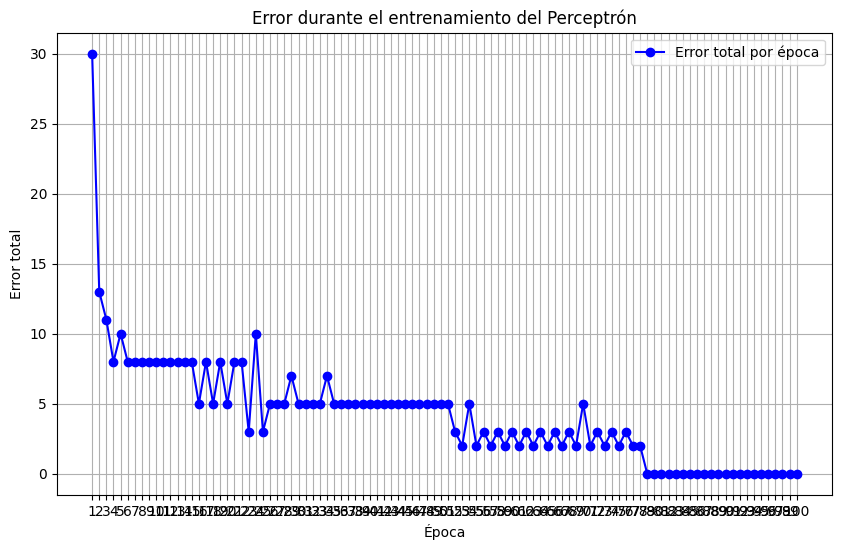

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función de activación escalonada para la salida booleana
def step_function(x):
    return 1 if x >= 0.5 else 0

# Clase del perceptrón
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Inicializar pesos y bias (con valores aleatorios pequeños)
        self.weights = np.random.rand(input_size) * 0.01
        self.bias = np.random.rand() * 0.01
        self.learning_rate = learning_rate

    # Predicción usando la función escalonada
    def predict(self, inputs):
        # Suma ponderada de las entradas más el sesgo
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicar la función de activación (escalonada)
        return step_function(weighted_sum)

    # Entrenamiento del perceptrón utilizando la regla delta
    def train(self, training_inputs, labels, epochs=10):
        # Lista para almacenar el error en cada época
        errors = []
        for epoch in range(epochs):
            total_error = 0  # Variable para acumular el error total de la época
            for inputs, label in zip(training_inputs, labels):
                # Calcular la salida predicha
                prediction = self.predict(inputs)
                
                # Calcular el error (diferencia entre la salida real y la predicción)
                error = label - prediction
                
                # Actualización de pesos y bias usando la regla delta
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                
                # Acumular el error total
                total_error += abs(error)
            
            # Almacenar el error total para esta época
            errors.append(total_error)
          

        # Devolver la lista de errores para graficar
        return errors

# Cargar el conjunto de datos separables.csv con nombres de columnas
data = pd.read_csv('separables.csv', sep=';')  # Sin header=None, se leerán las cabeceras automáticamente

# Inspeccionar las primeras filas del archivo para asegurarnos de que se han leído correctamente
print("Datos cargados del archivo CSV:\n", data.head())



# Dividir el dataset en entradas (X) y etiquetas booleanas (y)
X = data[['X1', 'X2']].values  # Seleccionar las columnas X1 y X2 como entradas
y = data['Y'].values            # Seleccionar la columna Y como salida

# Crear un perceptrón con dos entradas reales
perceptron = Perceptron(input_size=2)

# Entrenar el perceptrón durante 100 épocas con el conjunto de datos y almacenar los errores
errors = perceptron.train(X, y, epochs=100)

# Graficar el error por época
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o', color='b', label='Error total por época')
plt.title('Error durante el entrenamiento del Perceptrón')
plt.xlabel('Época')
plt.ylabel('Error total')
plt.xticks(range(1, len(errors) + 1))
plt.grid()
plt.legend()
plt.show()


Salida directa con sigmoide
    

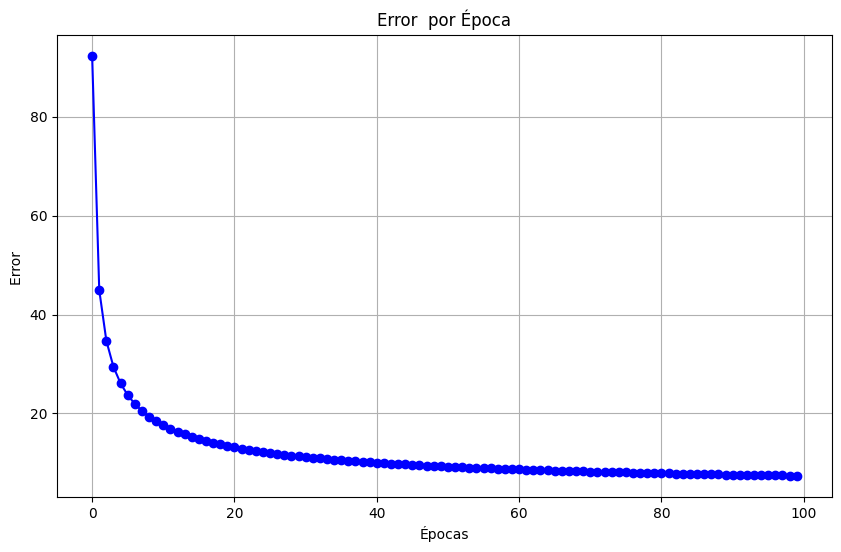


Prueba del perceptrón con datos reales:
Entradas: [-5.18436543  0.15974715], Salida predicha: 0.9998
Entradas: [-6.89603237  4.66558547], Salida predicha: 0.0014
Entradas: [-7.52321272  4.37073859], Salida predicha: 0.0082
Entradas: [-5.14904615  1.03321324], Salida predicha: 0.9948
Entradas: [-6.49575658  4.78531075], Salida predicha: 0.0006
Entradas: [-5.1187956   0.93712562], Salida predicha: 0.9963
Entradas: [-4.85314178  2.34751257], Salida predicha: 0.4939
Entradas: [-4.91158426  0.60987817], Salida predicha: 0.9987
Entradas: [-3.95067731  1.00781211], Salida predicha: 0.9832
Entradas: [-4.94968512  0.81306646], Salida predicha: 0.9972
Entradas: [-7.54826015  5.96388326], Salida predicha: 0.0000
Entradas: [-6.87111396  3.68516411], Salida predicha: 0.0517
Entradas: [-5.06958808  1.20627731], Salida predicha: 0.9893
Entradas: [-6.58899342  3.68126981], Salida predicha: 0.0392
Entradas: [-6.56167704  4.71395034], Salida predicha: 0.0008
Entradas: [-7.13991699  4.23040247], Salida 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Definir la derivada de la función sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Clase del perceptrón
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Inicializar pesos y bias (con valores aleatorios pequeños)
        self.weights = np.random.rand(input_size) * 0.01
        self.bias = np.random.rand() * 0.01
        self.learning_rate = learning_rate
        self.errors = []  # Lista para almacenar el error por época

    # Predicción usando la función de activación sigmoide
    def predict(self, inputs):
        # Suma ponderada de las entradas más el sesgo
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicar la función de activación (sigmoide)
        return sigmoid(weighted_sum)  # Retornar la salida continua de la sigmoide

    # Entrenamiento del perceptrón
    def train(self, training_inputs, labels, epochs=100):
        for epoch in range(epochs):
            epoch_error = 0  # Inicializar el error de la época
            for inputs, label in zip(training_inputs, labels):
                # Obtener la predicción usando sigmoide
                prediction = self.predict(inputs)
                
                # Cálculo del error (diferencia entre la salida real y la predicción sigmoide)
                error = label - prediction
                epoch_error += np.abs(error)  # Sumar el error absoluto para esta época
                
                # Derivada de la función de activación sigmoide
                adjustment = error * sigmoid_derivative(prediction)
                # Actualización de pesos y bias
                self.weights += self.learning_rate * adjustment * inputs
                self.bias += self.learning_rate * adjustment
            
            # Guardar el error promedio para esta época
            self.errors.append(epoch_error )

# Cargar el conjunto de datos desde 'separables.csv' usando ';' como separador
data = pd.read_csv('separables.csv', sep=';')

# Dividir el dataset en entradas (X) y etiquetas (y) usando los nombres de las columnas
X = data[['X1', 'X2']].values  
y = data['Y'].values  

# Crear un perceptrón con dos entradas reales
perceptron = Perceptron(input_size=X.shape[1])  # Usar el número de columnas en X

# Entrenar el perceptrón durante 100 épocas con el conjunto de datos
perceptron.train(X, y, epochs=100)

# Graficar el error por época
plt.figure(figsize=(10, 6))
plt.plot(perceptron.errors, marker='o', linestyle='-', color='b')
plt.title('Error  por Época')
plt.xlabel('Épocas')
plt.ylabel('Error ')
plt.grid()
plt.show()

print("\nPrueba del perceptrón con datos reales:")
for inputs in X:
    output = perceptron.predict(inputs)
    print(f"Entradas: {inputs}, Salida predicha: {output:.4f}")
